B(i):Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1

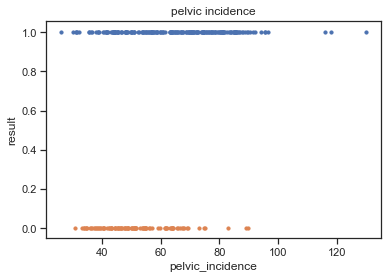

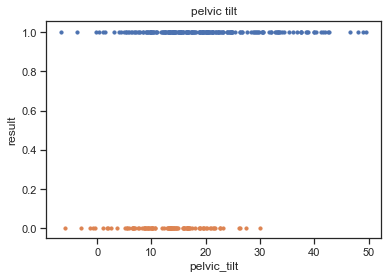

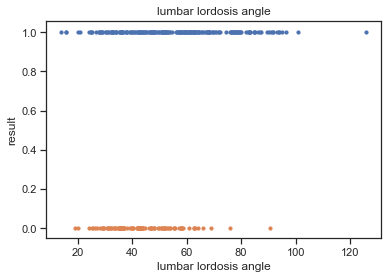

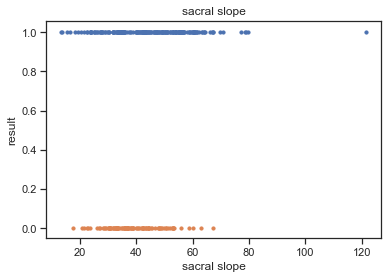

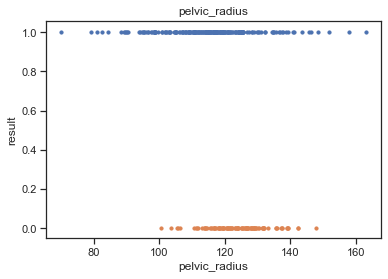

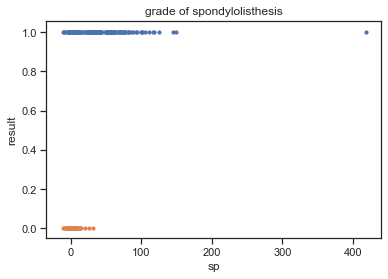

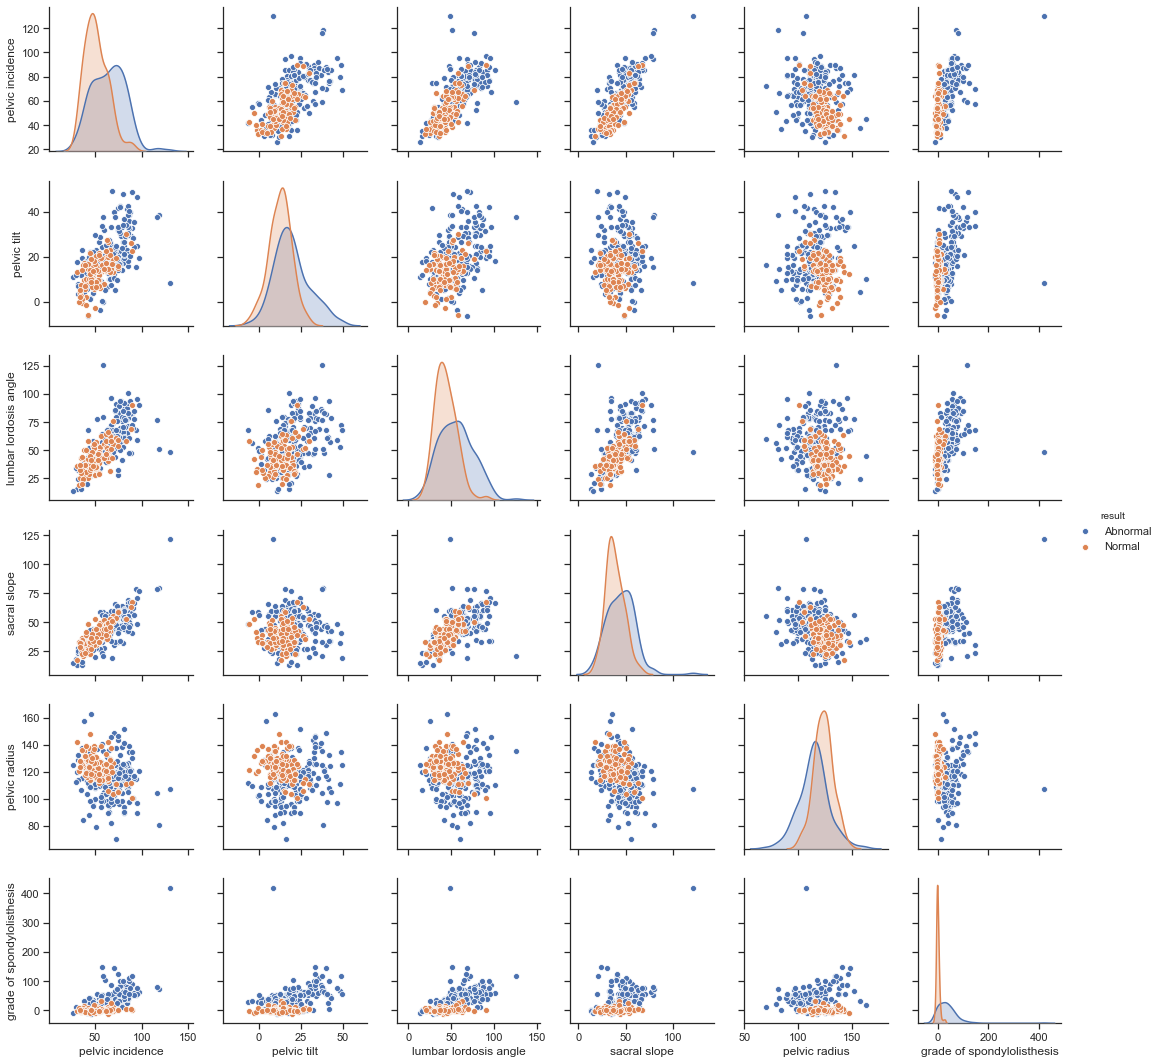

In [2]:
#Pre-Processing and Exploratory data analysis
import arff
import numpy as np
import matplotlib.pyplot as plot
unprocessdata=list()
pelvic_incidence, pelvic_tilt, lumbar, sacral_slope, pelvic_radius, sp, result= list(),list(),list(),list(),list(),list(),list()
#put the floder called vertebral_column_data and this file in the same floder.
for row in arff.load('vertebral_column_data/column_2C_weka.arff'):
        unprocessdata.append(row)
        pelvic_incidence.append(row[0])
        pelvic_tilt.append(row[1])
        lumbar.append(row[2])
        sacral_slope.append(row[3])
        pelvic_radius.append(row[4])
        sp.append(row[5])
        
        if row[6]=="Abnormal":
            result.append(1)
        else:
            result.append(0)
# scatterplots of each independent variable
plot.title("pelvic incidence")
plot.xlabel('pelvic_incidence')
plot.ylabel('result')
plot.scatter(pelvic_incidence[:210],result[:210],s=10)
plot.scatter(pelvic_incidence[210:],result[210:],s=10)
plot.show()

plot.title("pelvic tilt")
plot.xlabel('pelvic_tilt')
plot.ylabel('result')
plot.scatter(pelvic_tilt[:210],result[:210],s=10)
plot.scatter(pelvic_tilt[210:],result[210:],s=10)
plot.show()

plot.title("lumbar lordosis angle")
plot.xlabel('lumbar lordosis angle')
plot.ylabel('result')
plot.scatter(lumbar[:210],result[:210],s=10)
plot.scatter(lumbar[210:],result[210:],s=10)
plot.show()

plot.title("sacral slope")
plot.xlabel('sacral slope')
plot.ylabel('result')
plot.scatter(sacral_slope[:210],result[:210],s=10)
plot.scatter(sacral_slope[210:],result[210:],s=10)
plot.show()

plot.title("pelvic_radius")
plot.xlabel('pelvic_radius')
plot.ylabel('result')
plot.scatter(pelvic_radius[:210],result[:210],s=10)
plot.scatter(pelvic_radius[210:],result[210:],s=10)
plot.show()

plot.title("grade of spondylolisthesis")
plot.xlabel('sp')
plot.ylabel('result')
plot.scatter(sp[:210],result[:210],s=10)
plot.scatter(sp[210:],result[210:],s=10)
plot.show()

#use seaborn package to put all data in one plot
import seaborn as sns
import pandas as pd
df=pd.DataFrame(unprocessdata,index=None,columns=["pelvic incidence", "pelvic tilt", "lumbar lordosis angle", "sacral slope", "pelvic radius","grade of spondylolisthesis","result"])
sns.set(style="ticks", color_codes=True)
data_plot = sns.pairplot(df,hue = 'result')

B(ii):Make boxplots for each of the independent variables. Use color to show Classes 0 and 1

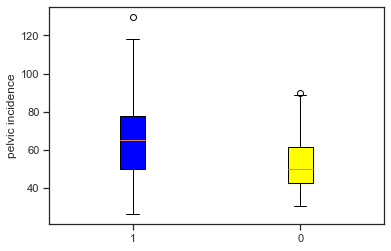

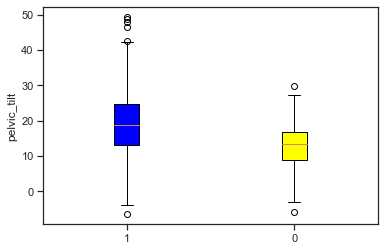

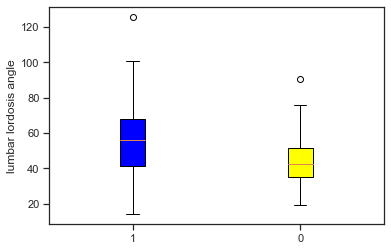

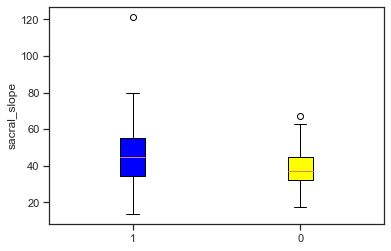

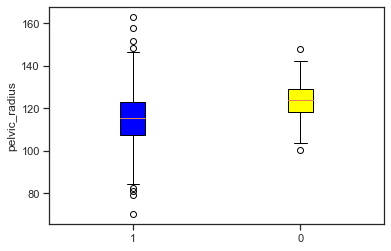

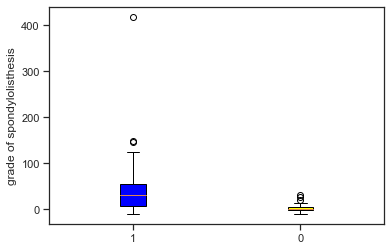

In [3]:
#boxplots for each of the independent variable
plot.ylabel('pelvic incidence')
bplot = plot.boxplot([pelvic_incidence[:210],pelvic_incidence[210:]], patch_artist=True,labels=["1","0"])
colors = ['blue', 'yellow']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
plot.show()

plot.ylabel('pelvic_tilt')
bplot = plot.boxplot([pelvic_tilt[:210],pelvic_tilt[210:]], patch_artist=True,labels=["1","0"])
colors = ['blue', 'yellow']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
plot.show()

plot.ylabel('lumbar lordosis angle')
bplot = plot.boxplot([lumbar[:210],lumbar[210:]], patch_artist=True,labels=["1","0"])
colors = ['blue', 'yellow']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
plot.show()

plot.ylabel('sacral_slope')
bplot = plot.boxplot([sacral_slope[:210],sacral_slope[210:]], patch_artist=True,labels=["1","0"])
colors = ['blue', 'yellow']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
plot.show()

plot.ylabel('pelvic_radius')
bplot = plot.boxplot([pelvic_radius[:210],pelvic_radius[210:]], patch_artist=True,labels=["1","0"])
colors = ['blue', 'yellow']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
plot.show()

plot.ylabel('grade of spondylolisthesis')
bplot = plot.boxplot([sp[:210],sp[210:]], patch_artist=True, labels=["1","0"])
colors = ['blue', 'yellow']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
plot.show()


B(iii):Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set

In [4]:
#buile training dataset and test dataset
training, test = list(),list()
test_true_result,training_result = list(),list()
for i in range(0,140):
    training.append([pelvic_incidence[i], pelvic_tilt[i], lumbar[i], sacral_slope[i], pelvic_radius[i], sp[i]])
    training_result.append(1)
for i in range(140,210):
    test.append([pelvic_incidence[i], pelvic_tilt[i], lumbar[i], sacral_slope[i], pelvic_radius[i], sp[i]])
    test_true_result.append(1)
for i in range(210,280):
    training.append([pelvic_incidence[i], pelvic_tilt[i], lumbar[i], sacral_slope[i], pelvic_radius[i], sp[i]])
    training_result.append(0)
for i in range(280,len(sp)):
    test.append([pelvic_incidence[i], pelvic_tilt[i], lumbar[i], sacral_slope[i], pelvic_radius[i], sp[i]])
    test_true_result.append(0)
train_array = np.array(training)
train_result_array = np.array(training_result)
test_array = np.array(test)
test_true_result_array = np.array(test_true_result)

C(i)&(ii): Classification using KNN on Vertebral Column Data Set

the best K value is:4
confusion matrix: 
 [[25  5]
 [ 1 69]]
true positive rate of best k is:  0.9857142857142858
true negative rate of best k is:  0.8333333333333334
precision of best k is:  0.9324324324324325
F-score of best k is:  0.9583333333333334


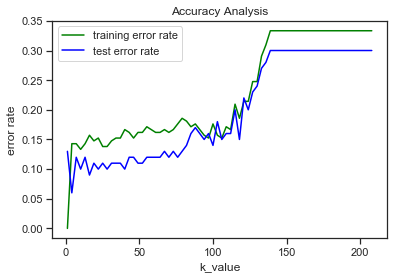

In [5]:
#Classification using KNN on Vertebral Column Data Set
#use package of scikit-learn
#Write code for k-nearest neighbors with Euclidean metric
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
#test different k
train_accuracy ,test_accuracy = list(),list()
k_array=np.arange(208,0,-3)
for k in k_array:
    knn = KNeighborsClassifier(n_neighbors=k,algorithm = "auto",metric='euclidean')
    knn.fit(train_array, train_result_array)
    #cal Precision
    train_accuracy.append(1-knn.score(train_array, train_result_array))
    test_accuracy.append(1-knn.score(test_array, test_true_result_array))
best_k_test = test_accuracy[::-1].index(min(test_accuracy))*3+1
knn = KNeighborsClassifier(n_neighbors=4,algorithm = "auto",metric='euclidean')
knn.fit(train_array, train_result_array)
test_predict_array=knn.predict(test_array)
print("the best K value is:"+str(best_k_test))
#confusion matrix,accuracy,precsion
confusion=confusion_matrix(test_true_result_array,test_predict_array)
print("confusion matrix: \n",confusion)
TN, FP, FN, TP = confusion.ravel()
true_positive=TP/(TP+FN)
print ("true positive rate of best k is: ", true_positive)
true_negative=TN/(TN+FP)
print ("true negative rate of best k is: ",true_negative)
precision=TP/(TP+FP)
print ("precision of best k is: ",precision)
Fscore=(2*TP)/((2*TP)+FP+FN)
print ("F-score of best k is: ",Fscore)
#show conclusion in plot
plot.title('Accuracy Analysis')
plot.plot(k_array, train_accuracy, color='green', label='training error rate')
plot.plot(k_array, test_accuracy, color='blue', label='test error rate')
plot.legend() # 显示图例
plot.xlabel('k_value')
plot.ylabel('error rate')
plot.show()


C(iii):Learning Curve

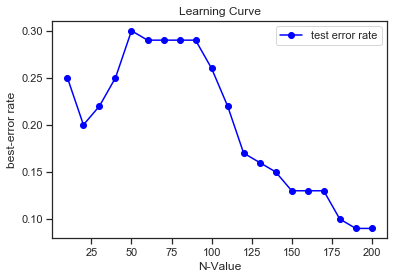

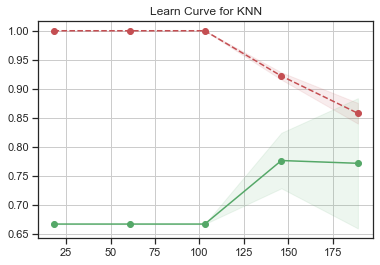

In [6]:
#plot learning Curve
from sklearn.model_selection import learning_curve
#write by self
best_train_score, best_test_score=list(),list()
N_array=np.arange(10,210,10)
for N in range(10,210,10):
    max_train_score, max_test_score=1.0, 1.0
    new_train_array = np.array(training[:N-N//3]+training[140:140+N//3])
    #new_test_array = np.array(training[N-N//3:140]+training[140+N//3:])
    new_train_result_array = np.array(training_result[:N-N//3]+training_result[140:140+N//3])
    #new_test_result_array = np.array(training_result[N-N//3:140]+training_result[140+N//3:]).reshape(-1,1)
    for k in range(1,N,5):
        knn = KNeighborsClassifier(n_neighbors=k,algorithm = "auto",metric='euclidean')
        knn.fit(new_train_array, new_train_result_array)
        max_train_score = min(max_train_score, 1-knn.score(new_train_array, new_train_result_array))
        max_test_score = min(max_test_score, 1-knn.score(test_array, test_true_result_array))
    best_train_score.append(max_train_score)
    best_test_score.append(max_test_score)
#plot learning curve
plot.title('Learning Curve')
plot.plot(N_array, best_test_score, "o-", color='blue', label='test error rate')
plot.legend()
plot.xlabel('N-Value')
plot.ylabel('best-error rate')
plot.show()

#scikit-learn learning curve
knn = KNeighborsClassifier(n_neighbors=5,algorithm = "auto",metric='euclidean')
train_size, train_score, test_score = learning_curve(knn, train_array, train_result_array, cv=10, train_sizes=np.linspace(0.1, 1.0, 5))

train_scores_mean = np.mean(train_score, axis=1)
train_scores_std = np.std(train_score, axis=1)
test_scores_mean = np.mean(test_score, axis=1)
test_scores_std = np.std(test_score, axis=1)

plot.fill_between(train_size, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plot.fill_between(train_size, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plot.plot(train_size, train_scores_mean, 'o--', color="r", label="Training score")
plot.plot(train_size, test_scores_mean, 'o-', color="g", label="Test score")

plot.grid()
plot.title('Learn Curve for KNN')
plot.show()
        
        
        

D: Further explore 

the best k value is:26


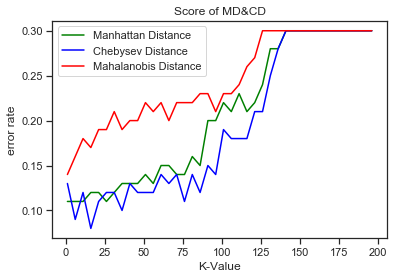

best log(P) is: [0.1, 0.2, 0.3, 0.6]


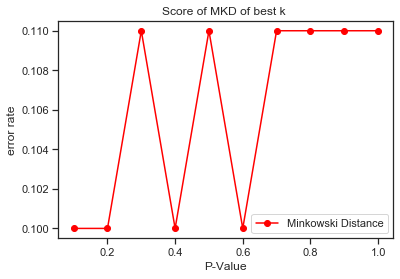

In [7]:
#further explore some variants of KNN
#Replace the Euclidean metric with the Minkowski Distance
#Manhattan Distance
test_score_MD, best_k =list(),0
for k in range(1,200,5):
    knn = KNeighborsClassifier(n_neighbors=k,algorithm = "auto",p=1, metric='minkowski')
    knn.fit(train_array, train_result_array)
    test_score_MD.append(1-knn.score(test_array, test_true_result_array))
best_k= 5*(len(test_score_MD)-(test_score_MD[::-1].index(min(test_score_MD))+1))+1
print("the best k value is:"+str(best_k))
#Chebyshev Distance
test_score_CD=list()
for k in range(1,200,5):
    knn = KNeighborsClassifier(n_neighbors=k,algorithm = "auto", metric='chebyshev')
    knn.fit(train_array, train_result_array)
    test_score_CD.append(1-knn.score(test_array, test_true_result_array))
#Mahalanobis Distance
test_score_MHD=list()
for k in range(1,200,5):
    knn = KNeighborsClassifier(n_neighbors=k,algorithm = "auto", metric='mahalanobis',metric_params=dict(V= np.cov(train_array, rowvar=False)))
    knn.fit(train_array, train_result_array)
    test_score_MHD.append(1-knn.score(test_array, test_true_result_array))

#show in plot
plot.title('Score of MD&CD')
plot.plot(np.array(list(range(1,200,5))), np.array(test_score_MD), color='green', label='Manhattan Distance')
plot.plot(np.array(list(range(1,200,5))), np.array(test_score_CD), color='blue', label='Chebysev Distance')
plot.plot(np.array(list(range(1,200,5))), np.array(test_score_MHD), color='red', label='Mahalanobis Distance')
plot.legend()
plot.xlabel('K-Value')
plot.ylabel('error rate')
plot.show()

#use the best_k to dicide which is the best p of Minkowski Distance
logP_array=np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
test_score_MKD=list()
best_logP=list()
for pvalue in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=best_k,algorithm = "auto",p=10**float(pvalue/10), metric='minkowski')
    knn.fit(train_array, train_result_array)
    test_score_MKD.append(1-knn.score(test_array, test_true_result_array))
for i in range(len(test_score_MD)):
    if test_score_MD[i]==min(test_score_MD):
        best_logP.append(logP_array[i])
print('best log(P) is:', best_logP)
plot.title('Score of MKD of best k ')
plot.plot(logP_array, np.array(test_score_MKD), "o-", color='red', label='Minkowski Distance')
plot.legend()
plot.xlabel('P-Value')
plot.ylabel('error rate')
plot.show()


E: Add the distance weight

the best error rate of Euclidean Distant is: 0.09999999999999998
the best error rate of Manhattan Distant is: 0.09999999999999998
the best error rate of Chebyshev Distant is: 0.10999999999999999



result of error rate with distance weight:
      Euclidean  Manhattan  Chebyshev
1         0.13       0.11       0.13
6         0.10       0.11       0.13
11        0.12       0.11       0.12
16        0.11       0.12       0.11
21        0.11       0.11       0.12
26        0.11       0.10       0.12
31        0.11       0.11       0.11
36        0.11       0.11       0.11
41        0.11       0.11       0.11
46        0.11       0.11       0.12
51        0.11       0.12       0.12
56        0.11       0.12       0.12
61        0.11       0.13       0.11
66        0.11       0.13       0.13
71        0.11       0.11       0.12
76        0.12       0.12       0.12
81        0.12       0.14       0.12
86        0.13       0.14       0.14
91        0.14       0.13       0.13
96        0.14    

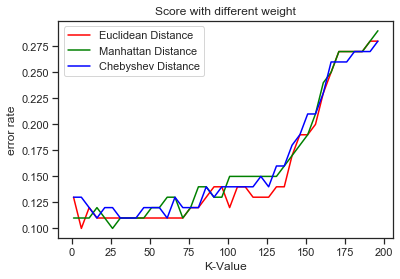

In [8]:
#give weight to different datapoint
#Euclidean Distance
k_array=np.array(list(range(1,200,5)))
score_ED=list()
for k in range(1,200,5):
    knn = KNeighborsClassifier(n_neighbors=k,algorithm = "auto",weights='distance', metric='euclidean')
    knn.fit(train_array, train_result_array)
    score_ED.append(1-knn.score(test_array, test_true_result_array))
best_score_ED=min(score_ED)
print("the best error rate of Euclidean Distant is:",best_score_ED)
#Manhattan Distance
score_MD=list()
for k in range(1,200,5):
    knn = KNeighborsClassifier(n_neighbors=k,algorithm = "auto",weights='distance', p=1 ,metric='minkowski')
    knn.fit(train_array, train_result_array)
    score_MD.append(1-knn.score(test_array, test_true_result_array))
best_score_MD=min(score_MD)
print("the best error rate of Manhattan Distant is:",best_score_MD)

#Chebyshev distance
score_CD=list()
for k in range(1,200,5):
    knn = KNeighborsClassifier(n_neighbors=k,algorithm = "auto",weights='distance' ,metric='chebyshev')
    knn.fit(train_array, train_result_array)
    score_CD.append(1-knn.score(test_array, test_true_result_array))
best_score_CD=min(score_CD)
print("the best error rate of Chebyshev Distant is:",best_score_CD)
print('\n\n')
#show in table
table= pd.DataFrame(np.array([score_ED, score_MD, score_CD]).T,index=k_array,columns=['Euclidean', 'Manhattan', 'Chebyshev'])
print ('result of error rate with distance weight:\n', table)
print('\n\n')
plot.title('Score with different weight')
plot.plot(k_array, np.array(score_ED), color='red', label='Euclidean Distance')
plot.plot(k_array, np.array(score_MD), color='green', label='Manhattan Distance')
plot.plot(k_array, np.array(score_CD), color='blue', label='Chebyshev Distance')
plot.legend()
plot.xlabel('K-Value')
plot.ylabel('error rate')
plot.show()



report for assignment 1
1.Mainly used tools:
	Jupyter Notebook
	Python 3.7
	Scikit-Learn, Numpy, Matplotlib, arff

2.The process of experiment:
	Analysis the requirement of this homework, determine what the experiment is trying to achieve.
	Decide to use which package of Python to achieve the requirement.
	Complete every question and show answers in plots.
	Analysis the result of this experiment and draw a conclusion

3.Details of each question in this homework
a)	Download the data from the official website

b)	Pre-Processing and Exploratory data analysis:
i.	At first, I create 36 plots to show the relationship between two independent variables, I use the seaborn to achieve it quickly and get the result. However,after communicating with classmates, they think we should use 6 plots to show the relationship between dependent variables and independent variables.In these plot, the X axis is the independent variables and Y axis is abnormal or normal. We can directly see the relationship betwwen denpendent variables and independent variables.

ii.	Based on the result of the first question, I draw some boxplots to show the distribution of data in a directly way. Through the boxplot, we can clearly know the median, average and some other meaages of denpendent variables.  
iii.In the question, I use four arraies to collect these dataset  

c)	Classification using KNN on Data set:
i.	I use scikit-learn package to achieve Euclidean metric directly and quickly

ii.	I use the method KNeighborsClassifier.socer to calculate the socre of different K and show training data’s score and test data’s score in a plot. Through analyze the plot, wen can know the best k value of training data is K=1, in this condition, the predict model is overfitting and not convincing. Comparatively, the best k value of test dataset is 4. This is a convincing conclusion.

iii.In this problem, I originally use the method of scikit-learn package to draw learning curve. However, the method learning_curve cannot meet the requiremment and the result is meaningless. Therefore, in order to achieve the requirement of this homework, I write the learning curve method by myself and show the best error rate of each N in a plot.

d)	Using Minkowski distance to replace Euclidean distance:
i.	The different between Minkowski distance, Euclidean distance, Manhattan distance and Chebyshev distance is the different p value. Therefore, I use the method of sklearn.KNeighborsClassifier and set different parameters to achieve different distance.  Through the line of Manhattan distance, we can know the best k value is 26 and I will use this number in next question.

ii.	In this question, I use the best k value which I gain from the previous problem. Through change the p value to know which is the best p of Minkowski distance.After analyzing the plot, we can know that there is not just one best p of Minkowski distance. We should combine with different conditions to decide to use which p value.

e)	In this problem, I add the distance weight to different training data point. The method sklearn.KNeighborsClassifier has a parameter called weight, through this parameter, we can add distance weight to dataset and draw a conclusion quickly. 

4.Conclusion:
 	In this experiment, I mainly use the package scikit-learn to solve problems. We can find that when K become large, the score will become low. However, we also cannot choose k=1 as the best value, the overfitting also causes the conclusion unconvincing. Therefore, through KNN, we can know the better K value rather than best K. We cannot test every k value, we just choose the best value from the sample.


